In [100]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import math




df = pd.read_csv('wine_quality.csv')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.drop(df.filter(regex="X"),axis=1, inplace=True)
#print(df)

def getProb(odds):
    return (math.e**odds)/(1+(math.e**odds))

def getResiduals(predicted,actual):
    residuals = []
    for i in range(len(predicted)):
        residuals[i] = actual[i] - predicted[i]
df = pd.DataFrame({
    'Likes_Popcorn': [1,1,0,1,0,0],
    'age': [12,87,44,19,32,14],
    'favorite_colour': ['1','2','1','3','2','1'],
    'love': ['1','1','0','0','1','1']
})
learningRate = 0.8
nodes = 3



def getModel(nodes,x,pseudoResiduals):
    #create tree with our pseudoResiduals
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor(max_leaf_nodes=nodes)
    model.fit(x,pseudoResiduals)


    #Get index of leaf where each test case goes
    idxLeaf = model.apply(x)

    up = np.zeros(len(idxLeaf))
    down = np.zeros(len(idxLeaf))

    for i in range(0,len(idxLeaf)):
        up[idxLeaf[i]] += pseudoResiduals[i]
        down[idxLeaf[i]] += getProb(pseudoResiduals[i]) * (1-getProb(pseudoResiduals[i]))

    newLeafPrediction = np.zeros(len(idxLeaf))
    for i in range(0,len(idxLeaf)):
        if down[i] != 0:
            model.tree_.value[i,0,0] = up[i]/down[i]
            newLeafPrediction[i] = up[i]/down[i]
    print(newLeafPrediction)
    return model


average = math.log(df['love'].value_counts()['1']/df['love'].value_counts()['0'])
print(average)
prob = getProb(average)
y_observed = np.zeros(len(df.love))
for i in range(0,len(df.love)):
    y_observed[i] = int(df.love.iloc[i])
print(y_observed)
pseudoResiduals = y_observed - prob
print(pseudoResiduals)

x = df
x = x.drop('love',axis=1)
model = getModel(nodes,x,pseudoResiduals)
modelPredictions = model.predict(x)

""" predictions = np.zeros(len(pseudoResiduals))
for i in range(len(pseudoResiduals)):
    predictions[i] = getProb(pseudoResiduals[i] + learningRate * modelPredictions[i])
print(predictions)

for i in range(0,len(pseudoResiduals)):
    pseudoResiduals[i] = y_observed[i] - predictions[i]
print("new residuals",pseudoResiduals)

print("second Tree")
model2 = getModel(nodes,x,pseudoResiduals)
modelPredictions = model2.predict(x)
predictions = np.zeros(len(pseudoResiduals))
for i in range(len(pseudoResiduals)):
    predictions[i] = getProb(pseudoResiduals[i] + learningRate * modelPredictions[i])
print(predictions)

for i in range(0,len(pseudoResiduals)):
    pseudoResiduals[i] = y_observed[i] - predictions[i]
print("new residuals",pseudoResiduals) """


testX = pd.DataFrame({
    'Likes_Popcorn': [1],
    'age': [12],
    'favorite_colour': ['1']
})


numTrees = 4
models = []

#Get average for the model and first residuals
average = math.log(df['love'].value_counts()['1']/df['love'].value_counts()['0'])
y_observed = np.zeros(len(df.love))
for i in range(0,len(df.love)):
    y_observed[i] = int(df.love.iloc[i])
pseudoResiduals = y_observed - getProb(average)

for i in range(0,numTrees):
    models.append(getModel(nodes,x,pseudoResiduals))
    modelPredictions = models[i].predict(x)
    predictions = np.zeros(len(pseudoResiduals))
    for i in range(len(pseudoResiduals)):
        predictions[i] = getProb(pseudoResiduals[i] + learningRate * modelPredictions[i])
    print(predictions)

    for i in range(0,len(pseudoResiduals)):
        pseudoResiduals[i] = y_observed[i] - predictions[i]

print("We made",numTrees,"and prdicted a new value")
testX = pd.DataFrame({
    'Likes_Popcorn': [1],
    'age': [12],
    'favorite_colour': ['1']
})

def predict(models,x,learningRate,average):
    odds = average
    for i in range(len(models)):
        odds += learningRate*models[i].predict(x)
    print(odds)
    print(getProb(odds))

predict(models,testX,learningRate,average)
"""
newprob = np.zeros(len(leafs))
prevprob = np.zeros(len(leafs))
for i in range(len(leafs)):
    newprob[leafs[i]] += residuals[i]
    prevprob += prob*(1-prob)
print("leafs",leafs)
pred = newprob/prevprob
print("leafPred",pred)
newPred = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    newPred[i] = average + learningRate*pred[i]
for i in newPred:
    print(getProb(i))
residuals = y_pred - newPred
print(residuals)

for i in range(len(pred)):
    if pred[i] != 0:
        model.tree_.value[i,0,0] = pred[i]*learningRate
        print("we are setting leaf",i,"to",pred[i]*learningRate)
prevModel = model


"""




"""

model.fit(x,residuals)
leafs = model.apply(x)
newprob = np.zeros(len(leafs))
prevprob = np.zeros(len(leafs))
for i in range(len(leafs)):
    newprob[leafs[i]] += residuals[i]
    prevprob += prob*(1-prob)
print("leafs",leafs)
pred = newprob/prevprob
print("leafPred",pred)




newPred = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    newPred[i] = average + learningRate*pred[i]
for i in newPred:
    print(getProb(i))
residuals = y_pred - newPred
print(residuals)
for i in range(len(pred)):
    if pred[i] != 0:
        model.tree_.value[i,0,0] = pred[i]*learningRate
        print("we are setting leaf",i,"to",pred[i]*learningRate)


"""
""" res = model.predict(testX)
err = 0
#print(res)
for i in range(len(res)):     
    err += (testY.iloc[i] - res[i])**2
print(err)
print(mean_squared_error(testY,res))
print(res) """

0.6931471805599453
[1. 1. 0. 0. 1. 1.]
[ 0.33333333  0.33333333 -0.66666667 -0.66666667  0.33333333  0.33333333]
[ 0.          0.         -2.97410077  1.37071458 -0.71325727  0.        ]
[ 0.          0.         -2.97410077  1.37071458 -0.71325727  0.        ]
[0.80688651 0.44095861 0.22491111 0.04539276 0.80688651 0.80688651]
[ 0.          0.          2.41547918  0.53775387 -0.91106959  0.        ]
[0.65097248 0.92353847 0.27812792 0.59503277 0.65097248 0.65097248]
[ 0.          0.         -2.59710077  1.43906209 -0.40752054  0.        ]
[0.81761581 0.43793306 0.3533961  0.06460281 0.81761581 0.81761581]
[ 0.          0.          2.43055981  0.48568888 -1.45818089  0.        ]
[0.63897896 0.92459727 0.17947024 0.58028618 0.63897896 0.63897896]
We made 4 and prdicted a new value
[3.75972271]
[0.97723989]


' res = model.predict(testX)\nerr = 0\n#print(res)\nfor i in range(len(res)):     \n    err += (testY.iloc[i] - res[i])**2\nprint(err)\nprint(mean_squared_error(testY,res))\nprint(res) '

In [271]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import math



def getProb(odds):
    return (math.e**odds)/(1+(math.e**odds))

def getResiduals(predicted,actual):
    residuals = []
    for i in range(len(predicted)):
        residuals[i] = actual[i] - predicted[i]

def getModel(nodes,x,pseudoResiduals):
    #create tree with our pseudoResiduals
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor(max_leaf_nodes=nodes)
    model.fit(x,pseudoResiduals)


    #Get index of leaf where each test case goes
    idxLeaf = model.apply(x)

    up = np.zeros(len(idxLeaf))
    down = np.zeros(len(idxLeaf))
    #print("len leafs",len(idxLeaf))
    #print("len Up",len(up))
    #print("len residuals",len(pseudoResiduals))
    for i in range(0,len(idxLeaf)):
        #print(i,pseudoResiduals[i])
        up[idxLeaf[i]] += pseudoResiduals[i]
        down[idxLeaf[i]] += getProb(pseudoResiduals[i]) * (1-getProb(pseudoResiduals[i]))

    newLeafPrediction = np.zeros(len(idxLeaf))
    for i in range(0,len(idxLeaf)):
        if down[i] != 0:
            model.tree_.value[i,0,0] = up[i]/down[i]
            newLeafPrediction[i] = up[i]/down[i]
    return model

def predict(models,x,learningRate,average):
    odds = average
    for i in range(len(models)):
        odds += learningRate*models[i].predict(x)
    return getProb(odds)
    #print(odds)
    #print(getProb(odds))

# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

learningRate = 0.001
nodes = 16
numTrees = 10
df = pd.read_csv("wine_quality.csv", true_values=["high"], false_values=["low"])
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.drop(df.filter(regex="X"),axis=1, inplace=True)
#df.drop('alcohol_level',axis=1, inplace=True)
df["quality"] = df["quality"].astype(int)
df = df.dropna()
x = df.drop('quality',axis=1)
y = df.quality
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

#Returns f1_score, accuracy,averageResidual
def buildAndTest(X_train,y_train,X_test,y_test,learningRate,nodes,numTrees):
    #Get average for the model and first residuals
    average = math.log((y_train==1).sum()/(y_train==0).sum())
    pseudoResiduals = np.zeros(len(y_train))
    for i in range(0,len(pseudoResiduals)):
        pseudoResiduals[i] = y_train.iloc[i] - getProb(average)

    models = []
    for i in range(0,numTrees):
        models.append(getModel(nodes,X_train,pseudoResiduals))
        modelPredictions = models[i].predict(X_train)
        predictions = np.zeros(len(pseudoResiduals))
        for i in range(len(pseudoResiduals)):
            predictions[i] = getProb(pseudoResiduals[i] + learningRate * modelPredictions[i])

        for i in range(0,len(pseudoResiduals)):
            pseudoResiduals[i] = y_train.iloc[i] - predictions[i]

    #learninRateResiduals.append(abs(pseudoResiduals.sum())/len(pseudoResiduals))
    res = predict(models,X_test,learningRate,average)
    predicted = []
    for i in range(0,len(res)):
        if res[i] > 0.5:
            predicted.append(1)
        else:
            predicted.append(0)
    #learninRateF1.append(f1_score(y_test,predicted))
    #learningRateAccuracy.append(accuracy_score(y_test,predicted))
    return f1_score(y_test,predicted),accuracy_score(y_test,predicted),(abs(pseudoResiduals.sum())/len(pseudoResiduals))

print(buildAndTest(X_train,y_train,X_test,y_test,0.971,16,10))



(0.43775100401606426, 0.8095238095238095, 0.004177068516892089)


0.005
0.2550000000000001
Best learning rate 0.97


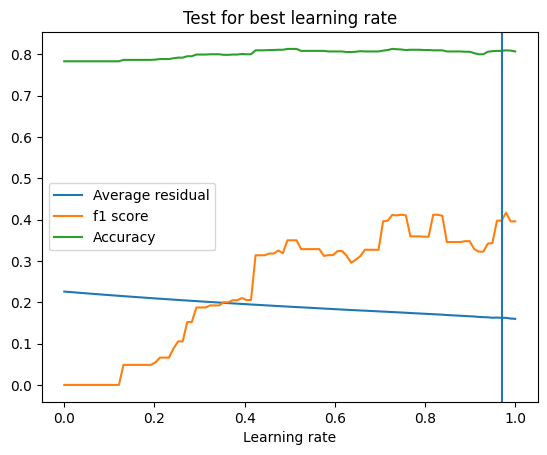

KeyboardInterrupt: 

In [268]:
import matplotlib.pyplot as plt

F1Score = []
Residuals = []
Accuracy = []
learningRate = 0.005
for i in range(0,200):
    if i%50 == 0:
        print(learningRate)
    learningRate += 0.005
    f1,acc,res = buildAndTest(X_train, y_train, X_test, y_test,learningRate,16,10)
    F1Score.append(f1)
    Accuracy.append(acc)
    Residuals.append(res)

best = np.array(F1Score)+np.array(Accuracy)-np.array(Residuals)
print("Best learning rate",np.where(best==best.max())[0][0]/200)
plt.title("Test for best learning rate")
plt.plot(np.linspace(0,1,200),Residuals,label="Average residual")
plt.plot(np.linspace(0,1,200),F1Score,label="f1 score")
plt.plot(np.linspace(0,1,200),Accuracy,label="Accuracy")
plt.axvline(np.where(best==best.max())[0][0]/200)
plt.xlabel("Learning rate")
plt.legend()
plt.show()

F1Score = []
Residuals = []
Accuracy = []
numTrees = 1
for i in range(0,60):
    numTrees += 1
    f1,acc,res = buildAndTest(X_train, y_train, X_test, y_test,0.971,16,numTrees)
    F1Score.append(f1)
    Accuracy.append(acc)
    Residuals.append(res)

best = np.array(F1Score)+np.array(Accuracy)-np.array(Residuals)
print("Best num trees",np.where(best==best.max())[0][0])
plt.title("Test for best number of trees to build")
plt.plot(np.linspace(0,60,60),Residuals,label="Average residual")
plt.plot(np.linspace(0,60,60),F1Score,label="f1 score")
plt.plot(np.linspace(0,60,60),Accuracy,label="Accuracy")
plt.axvline(np.where(best==best.max())[0][0])
plt.xlabel("Number of trees")
plt.legend()
plt.show()

F1Score = []
Residuals = []
Accuracy = []
numLeafs = 1
for i in range(0,100):
    numLeafs += 1
    f1,acc,res = buildAndTest(X_train, y_train, X_test, y_test,0.971,numLeafs,10)
    F1Score.append(f1)
    Accuracy.append(acc)
    Residuals.append(res)

best = np.array(F1Score)+np.array(Accuracy)-np.array(Residuals)
print("Best num of leafs",np.where(best==best.max())[0][0])
plt.title("Tests for best number of leafs to leave in each tree")
plt.plot(np.linspace(0,100,100),Residuals,label="Average residual")
plt.plot(np.linspace(0,100,100),F1Score,label="f1 score")
plt.plot(np.linspace(0,100,100),Accuracy,label="Accuracy")
plt.axvline(np.where(best==best.max())[0][0])
plt.xlabel("Number of leaves per tree")
plt.legend()
# COMMENT ABOUT OVERFITTING
""" The model does not overfit, becuase we set the max number of leafs for each tree we built. We are back prunning so we don't overfit. We got the best results with 10 trees"""

In [272]:
def k_fold(X, y, fold):
    f1Score = 0
    accuracy = 0
    residuals = 0
    counter = 0
    step_size = int(X.shape[0]/fold)
    for i in range(0,X.shape[0]-step_size,step_size):
        testX = X[i:i+step_size]        
        testY = y[i:i+step_size]    
        trainX = X[0:i]
        trainX = trainX.append(X[i+step_size+1:], ignore_index=True)        
        trainY = y[0:i]
        trainY = trainY.append(y[i+step_size+1:], ignore_index=True)
        f1,acc,resid = buildAndTest(trainX, trainY, testX, testY,0.971,16,10)
        f1Score += f1
        accuracy += acc
        residuals += resid
        counter += 1
    return (f1Score/counter),(accuracy/counter),(residuals/counter)

def k_fold_sci(X, y, fold):
    from sklearn.ensemble import GradientBoostingClassifier
    f1Score = 0
    accuracy = 0
    counter = 0
    step_size = int(X.shape[0]/fold)
    for i in range(0,X.shape[0]-step_size,step_size):
        testX = X[i:i+step_size]        
        testY = y[i:i+step_size]    
        trainX = X[0:i]
        trainX = trainX.append(X[i+step_size+1:], ignore_index=True)        
        trainY = y[0:i]
        trainY = trainY.append(y[i+step_size+1:], ignore_index=True)
        clf = GradientBoostingClassifier(learning_rate=1, max_leaf_nodes=16, random_state=0).fit(trainX, trainY)
        res = clf.predict(testX)
        f1Score += f1_score(res,testY)
        accuracy += accuracy_score(res,testY)
        counter += 1
    return (f1Score/counter),(accuracy/counter)

scores = k_fold(x,y,5)
scores_sci = k_fold_sci(x,y,5)
print("Our model tested on 5 folds")
print("Accuracy",scores[1],"f1 score",scores[0])
print("Scikit model tested on 5 folds")
print("Accuracy",scores_sci[1],"f1 score",scores_sci[0])

Our model tested on 5 folds
Accuracy 0.7914198161389172 f1 score 0.33475287558445094
Scikit model tested on 5 folds
Accuracy 0.7738508682328906 f1 score 0.42879092636797383


In [277]:
#XGBOOST
def k_fold_xgboost(X, y, fold):
    import xgboost as xgb
    f1Score = 0
    accuracy = 0
    counter = 0
    step_size = int(X.shape[0]/fold)
    for i in range(0,X.shape[0]-step_size,step_size):
        testX = X[i:i+step_size]        
        testY = y[i:i+step_size]    
        trainX = X[0:i]
        trainX = trainX.append(X[i+step_size+1:], ignore_index=True)        
        trainY = y[0:i]
        trainY = trainY.append(y[i+step_size+1:], ignore_index=True)
        clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
        clf.fit(trainX,trainY)
        res = clf.predict(testX)
        f1Score += f1_score(res,testY)
        accuracy += accuracy_score(res,testY)
        counter += 1
    return (f1Score/counter),(accuracy/counter)


#print(k_fold_xgboost(x,y,5))

from lightgbm import LGBMClassifier


(0.4322751895442914, 0.7936670071501531)
